This script is based on exc_inh.mouse_adult_brains.Saunders_2018.ipynb. 
It is modified to analyze more detailed subclusters of brain cell types. I.e., not only seperating neurons into excitatory and inhibitory neurons, but all >500 clusters of neuron and non-neuronal clusters. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from matplotlib_venn import venn3

# import heapq
import scipy.stats as stats

# import statsmodels.api as sm
# import matplotlib.ticker as mtick

# from statannot import add_stat_annotation

import pingouin as pg

# import plotly.express as px

matplotlib.rcParams['figure.dpi']= 300

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
annotation_df = pd.read_excel('../results/single-cell/saunders_2018/enhanced_annotation.xlsx',index_col='tissue_subcluster')
annotation_df.sort_index(axis=0,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# expression level in aggregated UMIs of each gene in each metacell
metacell_df = pd.read_csv('../data/single-cell/saunders_2018/metacells.BrainCellAtlas_Saunders_version_2018.04.01.csv', index_col=[0])

metacell_df.sort_index(axis=0,inplace=True)
metacell_df.sort_index(axis=1,inplace=True)

In [65]:
# Normalizing expression level by dividing UMI to total UMI of a subcluster
norm_express_df = metacell_df/metacell_df.sum()

In [4]:
avg_dNdS_df=pd.read_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t',usecols=['Gene name','mean'],index_col='Gene name')

avg_dNdS_df.rename(columns={'mean':'avg_dNdS'},inplace=True)

In [11]:
front_cortex_annot_df = annotation_df[annotation_df['tissue']=='P60Cortex_noRep5_FRONTALonly'].copy(deep=True)

In [38]:
annotation_df

,tissue,cluster_name,full_name,num_cells,tissue_abbrev,class,class_marker,type_marker,common_name,neurotransmitter,exc_inh,master_class
tissue_subcluster,,,,,,,,,,,,
CB_1-1,P60Cerebellum_ALT,GranularNeuron_Gabra6,Neuron.Slc17a7.Gabra6,10243,CB,NEURON,Slc17a7,Gabra6,Granule cells,Glutamate,exc,Neuron
CB_10-1,P60Cerebellum_ALT,Endothelial_Stalk_Flt1,Endothelial_Stalk.Flt1.Mgp,73,CB,ENDOTHELIAL_STALK,Flt1,Mgp,Endothelial_Stalk.Flt1.Mgp,Non-neuronal,Non-neuronal,Vasculature
CB_10-2,P60Cerebellum_ALT,Endothelial_Stalk_Flt1,Endothelial_Stalk.Flt1.Car4,76,CB,ENDOTHELIAL_STALK,Flt1,Car4,Endothelial_Stalk.Flt1.Car4,Non-neuronal,Non-neuronal,Vasculature
CB_10-3,P60Cerebellum_ALT,Endothelial_Stalk_Flt1,Endothelial_Stalk.Flt1.Lrg1,52,CB,ENDOTHELIAL_STALK,Flt1,Lrg1,Endothelial_Stalk.Flt1.Lrg1,Non-neuronal,Non-neuronal,Vasculature
CB_11-1,P60Cerebellum_ALT,Endothelial_Tip_Dcn,Endothelial_Tip.Dcn.Nnat,29,CB,ENDOTHELIAL_TIP,Dcn,Nnat,Endothelial_Tip.Dcn.Nnat,Non-neuronal,Non-neuronal,Vasculature
...,...,...,...,...,...,...,...,...,...,...,...,...
TH_8-1,P60Thalamus,Oligodendrocyte_Tfr,Oligodendrocyte.Trf.Klk6,1556,TH,OLIGODENDROCYTE,Trf,Klk6,Oligodendrocyte.Trf.Klk6,Non-neuronal,Non-neuronal,Glia
TH_8-2,P60Thalamus,Oligodendrocyte_Tfr,Oligodendrocyte.Trf.Il33,11530,TH,OLIGODENDROCYTE,Trf,Il33,Oligodendrocyte.Trf.Il33,Non-neuronal,Non-neuronal,Glia
TH_8-3,P60Thalamus,Oligodendrocyte_Tfr,Oligodendrocyte.Trf.Ctps,871,TH,OLIGODENDROCYTE,Trf,Ctps,Oligodendrocyte.Trf.Ctps,Non-neuronal,Non-neuronal,Glia


In [66]:
subcluster_expressed_dNdS_df = pd.DataFrame(columns=norm_express_df.columns)
for column in norm_express_df:
    index = norm_express_df[norm_express_df[column]>0.0001].index
    dNdS_list = avg_dNdS_df[avg_dNdS_df.index.isin(index)]['avg_dNdS']
    median_dNdS = dNdS_list.median()
    mean_dNdS = dNdS_list.mean()
    
    cluster_class=annotation_df.loc[column,'class']
    master_class=annotation_df.loc[column,'master_class']
    tissue=annotation_df.loc[column,'tissue']
    
    subcluster_expressed_dNdS_df.loc['median_dNdS',column]=median_dNdS
    subcluster_expressed_dNdS_df.loc['mean_dNdS',column]=mean_dNdS
    subcluster_expressed_dNdS_df.loc['class',column]=cluster_class
    subcluster_expressed_dNdS_df.loc['tissue',column]=tissue
    subcluster_expressed_dNdS_df.loc['master_class',column]=master_class

In [70]:
# subcluster_expressed_dNdS_df.T['class'].unique()
subcluster_expressed_dNdS_df.columns

Index(['CB_1-1', 'CB_10-1', 'CB_10-2', 'CB_10-3', 'CB_11-1', 'CB_11-2',
       'CB_11-3', 'CB_11-4', 'CB_11-5', 'CB_2-1',
       ...
       'TH_5-2', 'TH_6-1', 'TH_6-2', 'TH_7-1', 'TH_7-2', 'TH_8-1', 'TH_8-2',
       'TH_8-3', 'TH_8-4', 'TH_9-1'],
      dtype='object', length=565)

In [99]:
subcluster_expressed_dNdS_df

,CB_1-1,CB_10-1,CB_10-2,CB_10-3,CB_11-1,CB_11-2,CB_11-3,CB_11-4,CB_11-5,CB_2-1,...,TH_5-2,TH_6-1,TH_6-2,TH_7-1,TH_7-2,TH_8-1,TH_8-2,TH_8-3,TH_8-4,TH_9-1
median_dNdS,0.066131,0.080305,0.077911,0.07919,0.077932,0.080588,0.075244,0.078385,0.080287,0.06813,...,0.074567,0.076418,0.077192,0.083286,0.073634,0.07355,0.073099,0.07196,0.070829,0.071011
mean_dNdS,0.1399,0.113417,0.112095,0.113718,0.113202,0.116157,0.103395,0.106275,0.110009,0.09455,...,0.103218,0.10502,0.108852,0.129,0.109239,0.09935,0.098919,0.098817,0.096738,0.098382
class,NEURON,ENDOTHELIAL_STALK,ENDOTHELIAL_STALK,ENDOTHELIAL_STALK,ENDOTHELIAL_TIP,ENDOTHELIAL_TIP,MURAL,MURAL,MURAL,NEURON,...,MURAL,ENDOTHELIAL_TIP,ENDOTHELIAL_TIP,MACROPHAGE,MICROGLIA,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE
tissue,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,...,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus
master_class,Neuron,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Neuron,...,Vasculature,Vasculature,Vasculature,Glia,Glia,Glia,Glia,Glia,Glia,Glia


In [100]:
subcluster_expressed_dNdS_df.T['median_dNdS']=pd.to_numeric(subcluster_expressed_dNdS_df.T['median_dNdS'])

In [101]:
subcluster_expressed_dNdS_df

,CB_1-1,CB_10-1,CB_10-2,CB_10-3,CB_11-1,CB_11-2,CB_11-3,CB_11-4,CB_11-5,CB_2-1,...,TH_5-2,TH_6-1,TH_6-2,TH_7-1,TH_7-2,TH_8-1,TH_8-2,TH_8-3,TH_8-4,TH_9-1
median_dNdS,0.066131,0.080305,0.077911,0.07919,0.077932,0.080588,0.075244,0.078385,0.080287,0.06813,...,0.074567,0.076418,0.077192,0.083286,0.073634,0.07355,0.073099,0.07196,0.070829,0.071011
mean_dNdS,0.1399,0.113417,0.112095,0.113718,0.113202,0.116157,0.103395,0.106275,0.110009,0.09455,...,0.103218,0.10502,0.108852,0.129,0.109239,0.09935,0.098919,0.098817,0.096738,0.098382
class,NEURON,ENDOTHELIAL_STALK,ENDOTHELIAL_STALK,ENDOTHELIAL_STALK,ENDOTHELIAL_TIP,ENDOTHELIAL_TIP,MURAL,MURAL,MURAL,NEURON,...,MURAL,ENDOTHELIAL_TIP,ENDOTHELIAL_TIP,MACROPHAGE,MICROGLIA,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE,OLIGODENDROCYTE
tissue,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,P60Cerebellum_ALT,...,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus,P60Thalamus
master_class,Neuron,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Vasculature,Neuron,...,Vasculature,Vasculature,Vasculature,Glia,Glia,Glia,Glia,Glia,Glia,Glia


<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

<AxesSubplot:xlabel='master_class', ylabel='median_dNdS'>

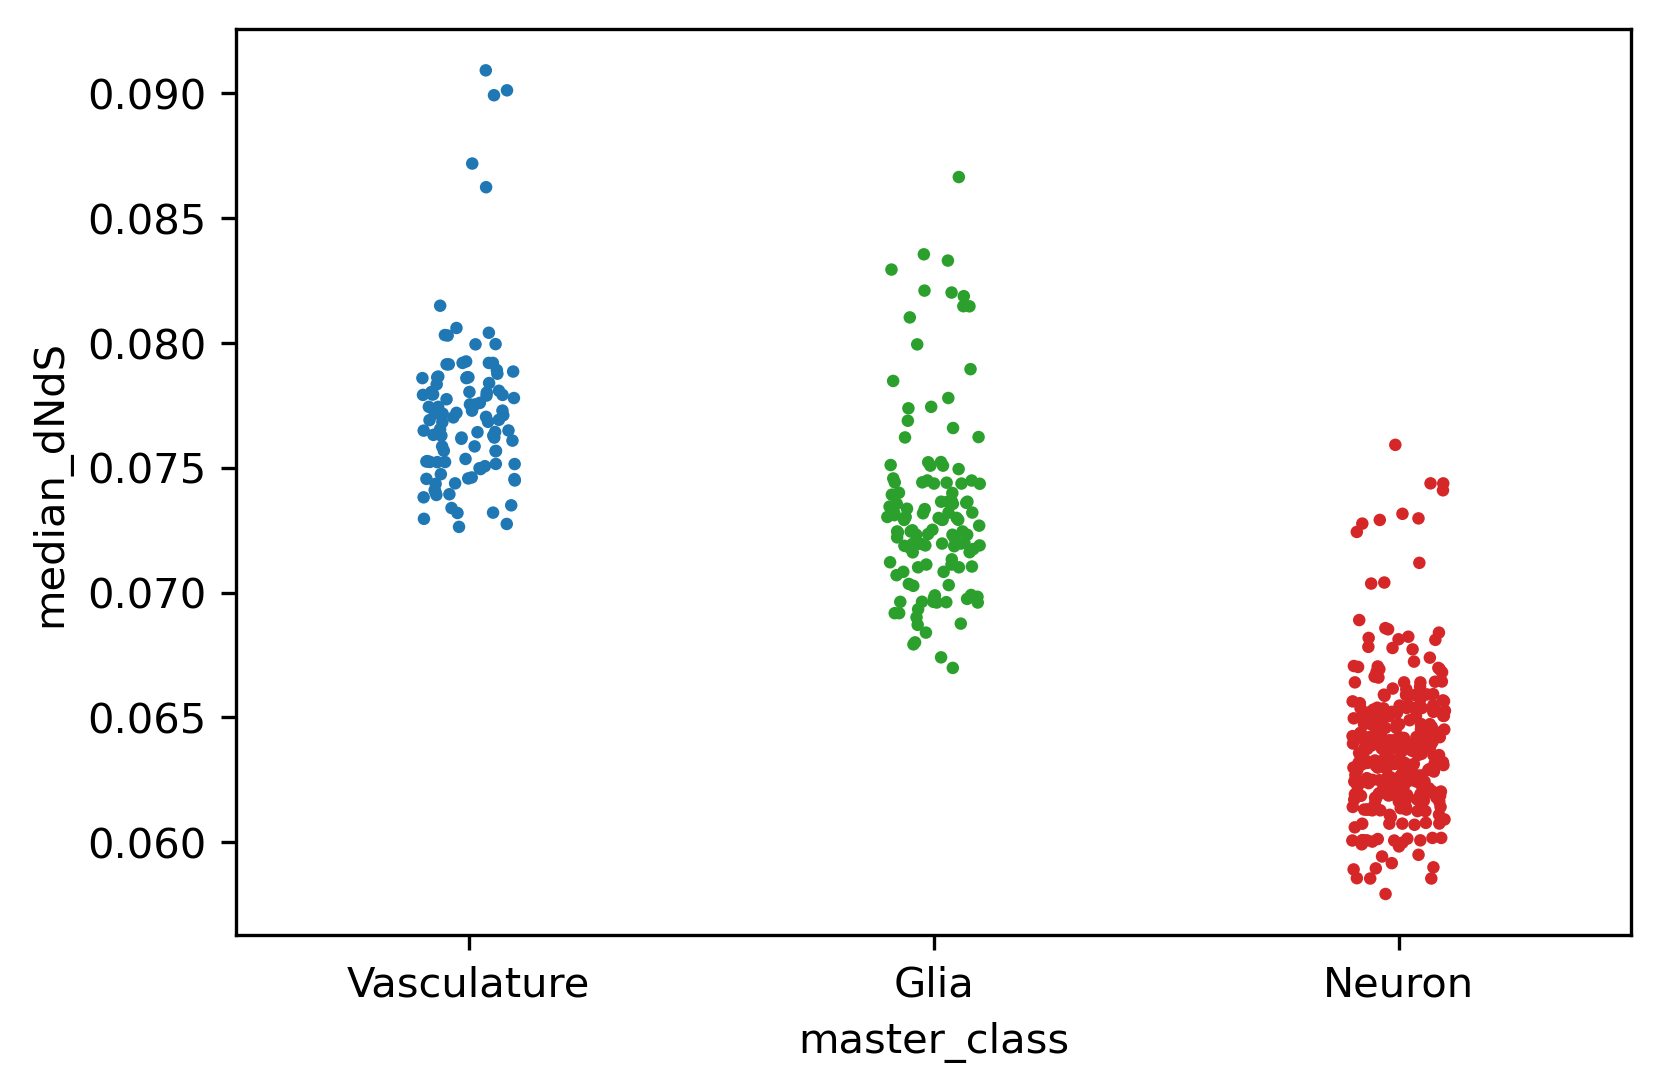

In [102]:
N_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Neuron']
G_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Glia']
V_data = subcluster_expressed_dNdS_df.T[subcluster_expressed_dNdS_df.T['master_class']=='Vasculature']

sns.stripplot(x='master_class',y='median_dNdS',data=N_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:red'],size=3)
sns.stripplot(x='master_class',y='median_dNdS',data=G_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:green'],size=3)
sns.stripplot(x='master_class',y='median_dNdS',data=V_data, order=['Vasculature', 'Glia','Neuron'], palette=['tab:blue'],size=3)

# ax.set(ylim=(0.103,0.104))
plt.show()

In [103]:
pg.mwu(G_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),alternative='two-sided')

pg.mwu(V_data['median_dNdS'].tolist(),G_data['median_dNdS'].tolist(),alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,40505.0,two-sided,5.572565e-56,-0.960172,0.980086


,U-val,alternative,p-val,RBC,CLES
MWU,35196.5,two-sided,1.616288e-53,-0.995266,0.997633


,U-val,alternative,p-val,RBC,CLES
MWU,10891.5,two-sided,4.239473e-19,-0.686643,0.843322


In [113]:
stats.kruskal(G_data['median_dNdS'].tolist(),N_data['median_dNdS'].tolist(),V_data['median_dNdS'].tolist())

KruskalResult(statistic=402.859175850594, pvalue=3.313152848321114e-88)